#**Face Classification**

In [1]:
#load libraries
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#read an image using openCV
img = cv2.imread('/content/drive/MyDrive/test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

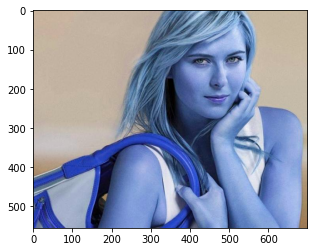

In [3]:
#display the image
plt.imshow(img)

In [4]:
#change it into gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

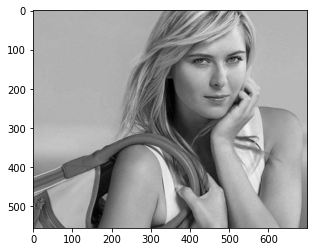

In [5]:
#Disply gray image
plt.imshow(gray, cmap='gray')

In [6]:
#Using OvenCV's face and eye cascade to detect them.
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencv/haarcascades/haarcascade_eye.xml')

#Locating faces in gray image 
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [7]:
#Locating the face location in image with x and y axis and its width and height
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

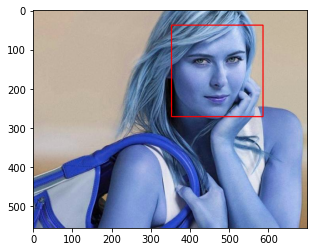

In [8]:
#Ploting the box enclosing the face
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

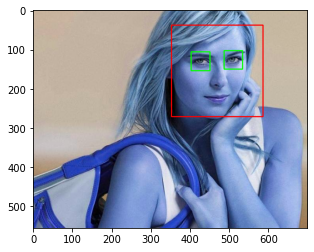

In [9]:
#Locating the eyes using the detected face
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

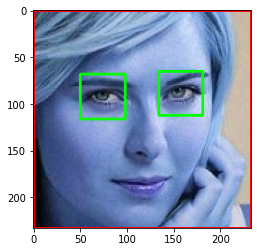

In [10]:
#Displaying the image from Region of Interest.
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
#Creating a function to do the same operation as done above to get the cropped image (if 2 eyes in the image).
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

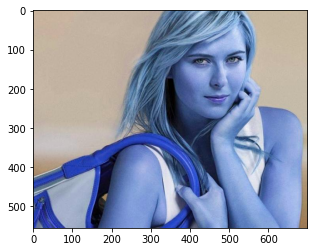

In [12]:
#Again importing image
original_image = cv2.imread('/content/drive/MyDrive/test_images/sharapova1.jpg')
plt.imshow(original_image)

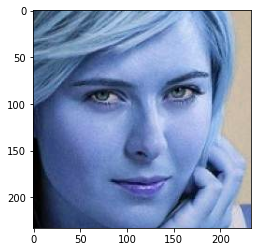

In [13]:
#Using the function get the cropped image
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/test_images/sharapova1.jpg')
plt.imshow(cropped_image)

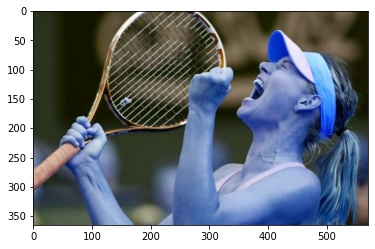

In [14]:
#Using another image where both eyes are not clearly visible
org_image_obstructed = cv2.imread('/content/drive/MyDrive/test_images/sharapova2.JPG')
plt.imshow(org_image_obstructed)

In [15]:
#Returned nothing as both eyes not clearly visible
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/drive/MyDrive/test_images/sharapova2.JPG')
cropped_image_no_2_eyes

In [16]:
#In wavelet transformed image, you can see edges clearly that can give us clues
#on various facial features such as eyes, nose, lips etc

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

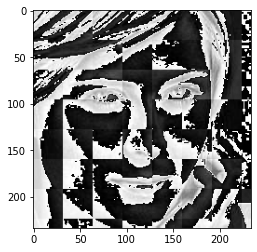

In [17]:
#Display the transformed image
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

##Data Cleaning

In [18]:
#Initialsing the path with all images and where to send cropped images
path_to_data = "/content/drive/MyDrive/dataset/"
path_to_cr_data = "/content/drive/MyDrive/dataset/cropped/"

In [19]:
#Listing all the sub-directories within the the dataset images folder
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

print(img_dirs)
img_dirs = img_dirs[0:5]
img_dirs

['/content/drive/MyDrive/dataset/virat_kohli', '/content/drive/MyDrive/dataset/roger_federer', '/content/drive/MyDrive/dataset/serena_williams', '/content/drive/MyDrive/dataset/lionel_messi', '/content/drive/MyDrive/dataset/maria_sharapova', '/content/drive/MyDrive/dataset/cropped']


['/content/drive/MyDrive/dataset/virat_kohli',
 '/content/drive/MyDrive/dataset/roger_federer',
 '/content/drive/MyDrive/dataset/serena_williams',
 '/content/drive/MyDrive/dataset/lionel_messi',
 '/content/drive/MyDrive/dataset/maria_sharapova']

In [20]:
#if cropped folder already exists, remove the folder then create new.
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
#Iterating throught each dataset image folders and gettiing cropped image for each image and
#saving it into cropped folder under respective folders of a particular person.
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

virat_kohli
Generating cropped images in folder:  /content/drive/MyDrive/dataset/cropped/virat_kohli
roger_federer
Generating cropped images in folder:  /content/drive/MyDrive/dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  /content/drive/MyDrive/dataset/cropped/serena_williams
lionel_messi
Generating cropped images in folder:  /content/drive/MyDrive/dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  /content/drive/MyDrive/dataset/cropped/maria_sharapova


In [23]:
#delete unwanted images from cropped folder and iterate again
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi28.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi26.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi27.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi29.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi25.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi24.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi23.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi32.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi30.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi3.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi22.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi20.png',
  '/content/drive/MyDrive/dataset/cropped/lionel_messi/lionel_messi33.png

In [24]:
#Assign a number to each player to use it in testing
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 3,
 'maria_sharapova': 4,
 'roger_federer': 1,
 'serena_williams': 2,
 'virat_kohli': 0}

In [25]:
#Images in cropped folder can be used for model training. 
#We will use these raw images along with wavelet transformed images to train our classifier.

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    print(celebrity_name)
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

virat_kohli
roger_federer
serena_williams
lionel_messi
maria_sharapova


In [26]:
len(X)

168

In [27]:
len(X[0])

4096

In [28]:
32*32*3 + 32*32

4096

In [29]:
X[0]

array([[ 62],
       [ 87],
       [113],
       ...,
       [254],
       [254],
       [ 81]], dtype=uint8)

In [30]:
#Reshape the X dataset.
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(168, 4096)

###Model Training

In [31]:
#import libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
#Split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#scale the dataset and train the model using SVM using Pipeline  
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8809523809523809

In [33]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.78      0.88         9
           2       0.71      0.71      0.71         7
           3       0.89      1.00      0.94         8
           4       0.90      0.90      0.90        10

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.87        42
weighted avg       0.89      0.88      0.88        42



In [34]:
#Using GridSearchCV to try different modelwith different paramets to come up with best modle with best fine tuned parameters
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [35]:
#Define different paramerters
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [36]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.824615,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.681846,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.849231,{'logisticregression__C': 1}


In [37]:
#get best estimators for model
best_estimators

{'logistic_regression': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('logisticregression',
                  LogisticRegression(C=1, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='liblinear', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False), 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
            

In [38]:
#Try for each model
best_estimators['svm'].score(X_test,y_test)

0.8809523809523809

In [39]:
best_estimators['random_forest'].score(X_test,y_test)

0.6190476190476191

In [40]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9047619047619048

In [41]:
#opting the best estimator
best_clf = best_estimators['logistic_regression']

In [42]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[8, 0, 0, 0, 0],
       [0, 9, 0, 0, 0],
       [0, 1, 5, 0, 1],
       [0, 0, 0, 7, 1],
       [0, 0, 0, 1, 9]])

Text(69.0, 0.5, 'Truth')

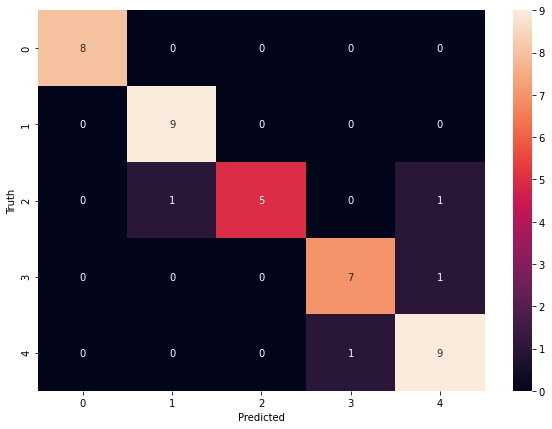

In [43]:
#for better visualisation
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
class_dict

{'lionel_messi': 3,
 'maria_sharapova': 4,
 'roger_federer': 1,
 'serena_williams': 2,
 'virat_kohli': 0}

###Save the Model

In [45]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

###Save class dictionary

In [46]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))